In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [5]:
from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

PATH='data/avito/'

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc
from io import StringIO
from matplotlib_venn import venn2

color = sns.color_palette()

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [163]:
train_df = pd.read_csv(f'{PATH}train.csv', parse_dates=["activation_date"])

In [164]:
test_df = pd.read_csv(f'{PATH}test.csv', parse_dates=["activation_date"])

In [166]:
len(train_df), len(test_df)

(1503424, 508438)

In [167]:
train_df.columns

Index(['item_id', 'user_id', 'region', 'city', 'parent_category_name',
       'category_name', 'param_1', 'param_2', 'param_3', 'title',
       'description', 'price', 'item_seq_number', 'activation_date',
       'user_type', 'image', 'image_top_1', 'deal_probability'],
      dtype='object')

In [168]:
add_datepart(train_df, 'activation_date')
add_datepart(test_df, 'activation_date')

In [191]:
train_df.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,user_type,image,image_top_1,deal_probability,activation_Year,activation_Month,activation_Week,activation_Day,activation_Dayofweek,activation_Dayofyear,activation_Is_month_end,activation_Is_month_start,activation_Is_quarter_end,activation_Is_quarter_start,activation_Is_year_end,activation_Is_year_start,activation_Elapsed
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,Empty Empty,Empty Empty,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789,2017,3,13,28,1,87,False,False,False,False,False,False,1490659200
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,Empty Empty,Empty Empty,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000,2017,3,12,26,6,85,False,False,False,False,False,False,1490486400
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",Empty Empty,Empty Empty,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177,2017,3,12,20,0,79,False,False,False,False,False,False,1489968000
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,Empty Empty,Empty Empty,Автокресло,Продам кресло от0-25кг,2200.0,286,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323,2017,3,12,25,5,84,False,False,False,False,False,False,1490400000
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797,2017,3,11,16,3,75,False,False,False,False,False,False,1489622400


In [192]:
cat_vars = ['region', 'city', 'parent_category_name', 'category_name', 'param_1', 'param_2', 'param_3', 'user_type', 'activation_Week', 'activation_Day', 'activation_Dayofweek']
cols_to_drop = ["item_id", "user_id", "title", "description", "image", 'activation_Year', 'activation_Month', 'activation_Is_year_end', 'activation_Is_year_start', 'activation_Elapsed', 'activation_Is_month_end', 'activation_Is_month_start','activation_Is_quarter_end', 'activation_Is_quarter_start', 'activation_Dayofyear']
contin_vars = ['price', 'image_top_1', 'item_seq_number']
#deal_probability
print(len(cat_vars)+len(cols_to_drop)+len(contin_vars))

29


In [170]:
print(train_df['image_top_1'].unique(),'\n\n', len(train_df['image_top_1'].unique()), '\n\n', train_df['image_top_1'].dtype)

[1008.  692. 3032.  796. 2264. 2823.  567.  415.   46. 1396.  119. 1040. 2849. 2133.  408. 1118.  983.   95.
   nan 2011. ... 2689.  616.  903. 1624. 2225. 1871. 2685. 2664.  619. 2659.  258.  320. 2684. 2682. 1748.
  380. 2250. 2030. 2087. 2680.] 

 3063 

 float64


In [171]:
train_df['image_top_1'].fillna(-1, inplace=True)
test_df['image_top_1'].fillna(-1, inplace=True)

In [172]:
train_df['param_1'].fillna('Empty Empty', inplace=True)
test_df['param_1'].fillna('Empty Empty', inplace=True)

In [173]:
train_df['param_2'].fillna('Empty Empty', inplace=True)
test_df['param_2'].fillna('Empty Empty', inplace=True)

In [174]:
train_df['param_3'].fillna('Empty Empty', inplace=True)
test_df['param_3'].fillna('Empty Empty', inplace=True)

In [175]:
train_df['price'].fillna(-1.0, inplace=True)
test_df['price'].fillna(-1.0, inplace=True)

In [193]:
#to_cat = ['region', 'city', 'parent_category_name', 'category_name', 'param_1', 'param_2', 'param_3', 'user_type']
for col in cat_vars:
    train_df[col] = train_df[col].astype('category')
    test_df[col] = test_df[col].astype('category')

In [177]:
train_df.isna().sum()

item_id                             0
user_id                             0
region                              0
city                                0
parent_category_name                0
category_name                       0
param_1                             0
param_2                             0
param_3                             0
title                               0
description                    116276
price                               0
item_seq_number                     0
user_type                           0
image                          112588
image_top_1                         0
deal_probability                    0
activation_Year                     0
activation_Month                    0
activation_Week                     0
activation_Day                      0
activation_Dayofweek                0
activation_Dayofyear                0
activation_Is_month_end             0
activation_Is_month_start           0
activation_Is_quarter_end           0
activation_I

In [178]:
test_df.isna().sum()

item_id                            0
user_id                            0
region                             0
city                               0
parent_category_name               0
category_name                      0
param_1                            0
param_2                            0
param_3                            0
title                              0
description                        0
price                              0
item_seq_number                    0
user_type                          0
image                          42609
image_top_1                        0
activation_Year                    0
activation_Month                   0
activation_Week                    0
activation_Day                     0
activation_Dayofweek               0
activation_Dayofyear               0
activation_Is_month_end            0
activation_Is_month_start          0
activation_Is_quarter_end          0
activation_Is_quarter_start        0
activation_Is_year_end             0
a

In [180]:
val_idx = get_cv_idxs(len(train_df))

In [181]:
train_y = train_df["deal_probability"].values
test_id = test_df["item_id"].values

In [194]:
train_X = train_df.drop(cols_to_drop, axis=1)

In [195]:
test_X = test_df.drop(cols_to_drop, axis=1)

In [196]:
train_X.isna().sum()

region                  0
city                    0
parent_category_name    0
category_name           0
param_1                 0
param_2                 0
param_3                 0
price                   0
item_seq_number         0
user_type               0
image_top_1             0
deal_probability        0
activation_Week         0
activation_Day          0
activation_Dayofweek    0
dtype: int64

In [197]:
df, y, nas, mapper = proc_df(train_X, 'deal_probability', do_scale=True)

In [198]:
df.head()

,region,city,parent_category_name,category_name,param_1,param_2,param_3,price,item_seq_number,user_type,image_top_1,activation_Week,activation_Day,activation_Dayofweek
0,20,461,5,43,250,39,476,-0.004592,-0.133095,2,-0.142405,3,18,2
1,18,1301,3,23,123,39,476,-0.004552,-0.130044,2,-0.461891,2,16,7
2,17,1277,1,3,85,39,476,-0.004537,-0.131839,2,1.903920,2,10,1
3,22,941,5,43,39,39,476,-0.004564,-0.082131,1,-0.356744,2,15,6
4,5,318,7,1,279,120,45,-0.003983,-0.132915,2,1.127449,1,6,4


In [199]:
print ('Categorical Variables:\t\t',cat_vars,'\n\nContinuous Variables:\t\t',contin_vars,'\n\nTotal Length:\t\t',len(cat_vars)+len(contin_vars))

Categorical Variables:		 ['region', 'city', 'parent_category_name', 'category_name', 'param_1', 'param_2', 'param_3', 'user_type', 'activation_Week', 'activation_Day', 'activation_Dayofweek'] 

Continuous Variables:		 ['price', 'image_top_1', 'item_seq_number'] 

Total Length:		 14


In [200]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508438 entries, 0 to 508437
Data columns (total 14 columns):
region                  508438 non-null category
city                    508438 non-null category
parent_category_name    508438 non-null category
category_name           508438 non-null category
param_1                 508438 non-null category
param_2                 508438 non-null category
param_3                 508438 non-null category
price                   508438 non-null float64
item_seq_number         508438 non-null int64
user_type               508438 non-null category
image_top_1             508438 non-null float64
activation_Week         508438 non-null category
activation_Day          508438 non-null category
activation_Dayofweek    508438 non-null category
dtypes: category(11), float64(2), int64(1)
memory usage: 19.1 MB


In [201]:
df_test, _, nas, mapper = proc_df(test_X, do_scale=True, mapper=mapper, na_dict=nas)

In [202]:
df_test.head()

,region,city,parent_category_name,category_name,param_1,param_2,param_3,price,item_seq_number,user_type,image_top_1,activation_Week,activation_Day,activation_Dayofweek
0,5,307,5,11,109,178,63,-0.004598,-0.121610,2,0.880757,2,7,2
1,20,934,9,6,118,33,394,-0.004552,-0.132736,2,-1.162535,1,5,7
2,13,148,1,3,311,33,394,-0.004367,-0.130762,2,1.831126,2,6,1
3,19,1239,3,5,107,112,394,-0.004529,-0.120892,2,-1.162535,2,6,1
4,15,237,5,43,101,33,394,-0.004523,-0.130762,2,-0.148472,1,4,6


In [203]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, y, cat_flds=cat_vars, bs=128, test_df=df_test)

In [206]:
cat_sz = [(c, len(train_X[c].cat.categories)+1) for c in cat_vars]
cat_sz

[('region', 29),
 ('city', 1734),
 ('parent_category_name', 10),
 ('category_name', 48),
 ('param_1', 373),
 ('param_2', 273),
 ('param_3', 1221),
 ('user_type', 4),
 ('activation_Week', 5),
 ('activation_Day', 22),
 ('activation_Dayofweek', 8)]

In [207]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]
emb_szs

[(29, 15),
 (1734, 50),
 (10, 5),
 (48, 24),
 (373, 50),
 (273, 50),
 (1221, 50),
 (4, 2),
 (5, 3),
 (22, 11),
 (8, 4)]

In [212]:
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

#max_log_y = np.max(y)
#y_range = (0, max_log_y*1.2)
y_range = (0, 1)

In [213]:
y_range

(0, 1)

In [214]:
m = md.get_learner(emb_szs, len(contin_vars), 0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)

In [215]:
m.lr_find()

epoch      trn_loss   val_loss                                   
    0      0.090479   0.086802  



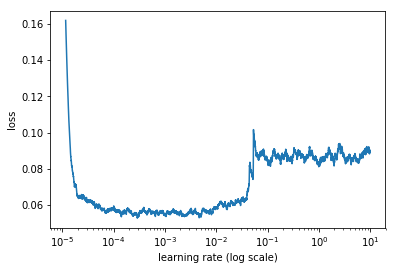

In [216]:
m.sched.plot(100)

In [218]:
lr = 0.5*(1e-4)

5e-05

In [219]:
m.fit(lr, 1, metrics=[exp_rmspe])

epoch      trn_loss   val_loss   exp_rmspe                       
    0      0.056478   0.054541   0.206724  



[array([0.05454]), 0.20672420638092398]

In [ ]:
m.fit(lr, 1, metrics=[exp_rmspe])